# Project 2: Linear Classification

### Submitted by: Prateek Kumar 

## Part 1: Generate Training and Testing Data 

#### Importing the required packages 

In [1]:
import numpy as np                              # import numpy
from numpy.linalg import inv                    # for matrix inverse
import matplotlib.pyplot as plt                 # import matplotlib.pyplot for plotting framework
import random                                   # for setting the seed value

#### Setting the seed value

In [2]:
random.seed(9006)

#### Mean and covariances of +1 and -1 class

In [3]:
meanX = [1,1]                                                # mean of +1 class
meanY = [-1,-1]                                              # mean of -1 class
covX = [[3, 2], [2, 3]]                                      # covariance matrix of +1 class
covY = [[2, -1], [-1, 2]]                                    # covariance matrix of -1 class

#### Generating 200 samples from a normal distribution

In [4]:
x = np.random.multivariate_normal(meanX, covX, size=(200,))  # Generating 200 samples for +1
y = np.random.multivariate_normal(meanY, covY, size=(200,))  # Generating 200 samples for -1

#### Partition the data into two groups: training data and testing data.

In [5]:
from sklearn.model_selection import train_test_split                   # Partitioning the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)

#### Scatter Plot for training data from +1 and -1 class

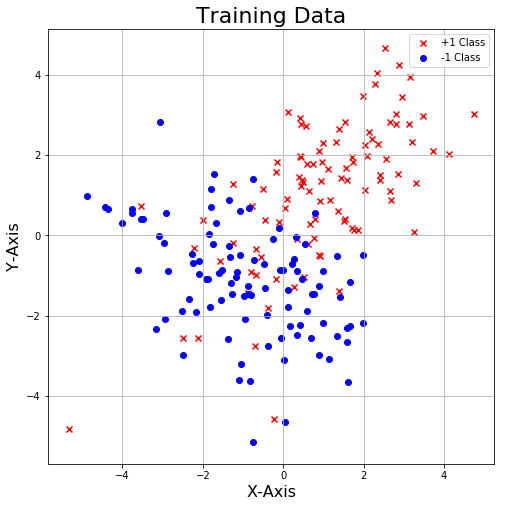

In [6]:
plt.figure(figsize=(8,8))                                                          # creating the figure and assigning the size
plt.scatter(x_train[:,0], x_train[:,1], c='r', marker='x', label='+1 Class')       # class +1 training scatter plot
plt.scatter(y_train[:,0], y_train[:,1], c='b', marker='o', label='-1 Class')       # class -1 training scatter plot
plt.axis('equal')                                                                  # making both the axis equal
plt.legend(loc='best')                                                             # assigning the legend location
plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
plt.title('Training Data', fontsize=22)                                            # Title of the plot
plt.grid()                                                                         # displaying gridlines
plt.show()                                                                         # displaying the plot

#### Scatter Plot for testing data from +1 and -1 class

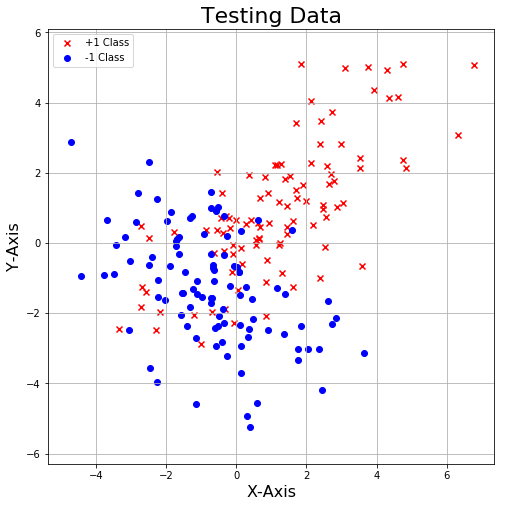

In [7]:
plt.figure(figsize=(8,8))                                                          # creating the figure and assigning the size
plt.scatter(x_test[:,0], x_test[:,1], c='r', marker='x', label='+1 Class')         # class +1 testing scatter plot
plt.scatter(y_test[:,0], y_test[:,1], c='b', marker='o', label='-1 Class')         # class -1 testing scatter plot
plt.axis('equal')                                                                  # making both the axis equal
plt.legend(loc='best')                                                             # assigning the legend location
plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
plt.title('Testing Data', fontsize=22)                                             # Title of the plot
plt.grid()                                                                         # displaying gridlines
plt.show()                                                                         # displaying the plot

## Part 2: Linear Discriminant Analysis 

#### Training Data 

In [8]:
train_data = np.append(x_train,y_train,axis=0)

#### Calculating the mean of both +1 and -1 class for the training data

In [9]:
m_p1 = np.mean(x_train,axis=0)                #mean of class +1
m_m1 = np.mean(y_train,axis=0)                #mean of class -1

#### Centering the data 

In [10]:
cen_arr = np.append(x_train-m_p1,y_train-m_m1,axis=0)

#### Estimating the overall covariance 

In [11]:
cov = (1/199) * np.dot(np.transpose(cen_arr), cen_arr)

#### Shape of X and estimated covariance  

In [12]:
print("Shape of X:",train_data.shape)
print("Shape of estimated covariance:",cov.shape)

Shape of X: (200, 2)
Shape of estimated covariance: (2, 2)


#### Calculating the 'w' value 

In [13]:
cov_inv = inv(np.matrix(cov))
w = np.dot((m_p1 - m_m1), cov_inv)

#### Learned Weight 

In [14]:
print("Learned Weight:",w)

Learned Weight: [[0.58080783 0.78600509]]


#### Calculating the Bias 

In [15]:
b = 0.5*((np.dot(np.dot(cov_inv,m_p1),np.transpose(m_p1)))-(np.dot(np.dot(cov_inv,m_m1),np.transpose(m_m1),)))

In [16]:
print("Bias Term:",b[0,0])

Bias Term: 0.0009113154785456712


#### Testing Data 

In [17]:
test_data = np.append(x_test,y_test,axis=0)

#### Finding the index of correctly classified and misclassified points from both the classes

In [18]:
f = np.dot(test_data,np.transpose(w)) + b
f1 = f>0
corr_p1,wr_p1,corr_m1,wr_m1=[],[],[],[]
count=0
for i in range(0,len(f1)):
    if(i<100):
        if(int(f1[i]) == 1):
            count+=1
            corr_p1.append(i)
        else:
            wr_p1.append(i)
    elif(i>=100):
        if(int(f1[i]) == 0):
            count+=1
            corr_m1.append(i-100)
        else:
            wr_m1.append(i-100)

#### Classification Accuracy of LDA on the given data

In [19]:
print("Classification Accuracy:",(count/200)*100,"%")

Classification Accuracy: 81.0 %


#### Finding the correctly classified and misclassified points from both the classes

In [20]:
x_c,x_w,y_c,y_w = [],[],[],[]

for i in corr_p1:
    x_c.append(x_test[i])
for i in wr_p1:
    x_w.append(x_test[i])
for i in corr_m1:
    y_c.append(y_test[i])
for i in wr_m1:
    y_w.append(y_test[i])
    
x_c = np.array(x_c)
x_w = np.array(x_w)
y_c = np.array(y_c)
y_w = np.array(y_w)

#### Scatter plot of testing data after LDA 

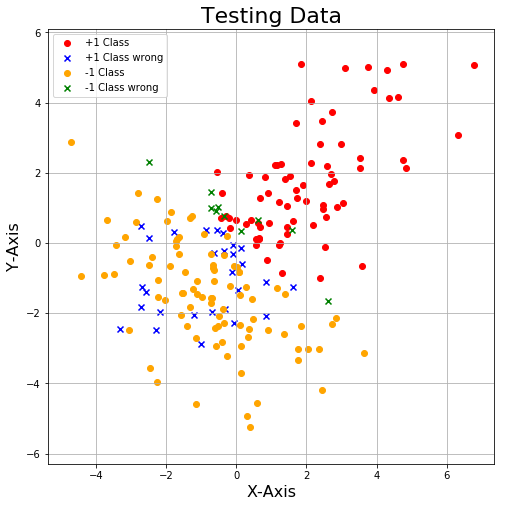

In [21]:
plt.figure(figsize=(8,8))                                                          # creating the figure and assigning the size
plt.scatter(x_c[:,0], x_c[:,1], c='red', marker='o', label='+1 Class')             # class +1 testing scatter plot
plt.scatter(x_w[:,0], x_w[:,1], c='blue', marker='x', label='+1 Class wrong')      # class +1 wrong testing scatter plot
plt.scatter(y_c[:,0], y_c[:,1], c='orange', marker='o', label='-1 Class')          # class -1 testing scatter plot
plt.scatter(y_w[:,0], y_w[:,1], c='green', marker='x', label='-1 Class wrong')     # class -1 wrong testing scatter plot
plt.axis('equal')                                                                  # making both the axis equal
plt.legend(loc='best')                                                             # assigning the legend location
plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
plt.title('Testing Data', fontsize=22)                                             # Title of the plot
plt.grid()                                                                         # displaying gridlines
plt.show()                                                                         # displaying the plot

## Part 3: Logistic Regression

In [22]:
train_data = np.append(x_train,y_train,axis=0)                     # Training Data
v1 = np.repeat(1, 200)
v1 = np.vstack(v1)
train_data = np.hstack((train_data, v1))                           # Lumping a '1' into each data point

x1 = np.repeat(1, 100)
x1 = np.vstack(x1)
x2 = np.repeat(-1, 100)
x2 = np.vstack(x2)
y = np.vstack((x1,x2))                                             # y vector with 100 each of +1 and -1 values

w = np.array([0,0,0])                                              # initial weight vector
while True:                                                        # Loop until w is not converged
    s_arr = np.array([])
    z_arr = np.array([])
    for i in range(0,len(train_data)):                             # Calculating 'p', 's' and 'z' values
        p_temp = np.dot(np.exp(np.transpose(w)),train_data[i])
        p = p_temp/(1+p_temp)
        s = p * (1-p)
        s_arr = np.append(s_arr,s)
        z = (np.dot(np.transpose(w),train_data[i])) + ((y[i]-p)/s)
        z_arr = np.append(z_arr,z)
    s_arr = np.diag(s_arr)                                         # Calculating 'S'(Diagonal Matrix)
    z_arr = np.array(z_arr)
    p1 = inv(np.dot(np.transpose(train_data), np.dot(s_arr,train_data)))
    p2 = np.dot(np.dot(np.transpose(train_data),s_arr),z_arr)
    p2 = np.dot(np.transpose(train_data), np.dot(s_arr,z_arr))
    
    w_for = np.dot(p2,p1)                                          # Calculating new 'w' value
    if(np.linalg.norm(w_for)-np.linalg.norm(w)<0.01):              # Checking if w is converged
        break
    else:
        w = w_for

#### Learned Weights 

In [23]:
print("Learned Weights:",w)

Learned Weights: [0.8056418  0.85758823 1.85689788]


#### Testing Data 

In [24]:
test_data = np.hstack((test_data, v1))

#### Finding the index of correctly classified and misclassified points from both the classes

In [25]:
f = np.dot(test_data,np.transpose(w))
f1 = f>0.5
corr_p1,wr_p1,corr_m1,wr_m1=[],[],[],[]
count=0
for i in range(0,len(f1)):
    if(i<100):
        if(int(f1[i]) == 1):
            count+=1
            corr_p1.append(i)
        else:
            wr_p1.append(i)
    elif(i>=100):
        if(int(f1[i]) == 0):
            count+=1
            corr_m1.append(i-100)
        else:
            wr_m1.append(i-100)

#### Classification Accuracy of LR on the given data

In [26]:
print("Classification Accuracy:",(count/200)*100,"%")

Classification Accuracy: 71.0 %


#### Finding the correctly classified and misclassified points from both the classes

In [27]:
x_c,x_w,y_c,y_w = [],[],[],[]

for i in corr_p1:
    x_c.append(x_test[i])
for i in wr_p1:
    x_w.append(x_test[i])
for i in corr_m1:
    y_c.append(y_test[i])
for i in wr_m1:
    y_w.append(y_test[i])
    
x_c = np.array(x_c)
x_w = np.array(x_w)
y_c = np.array(y_c)
y_w = np.array(y_w)

#### Scatter plot of testing data after LR

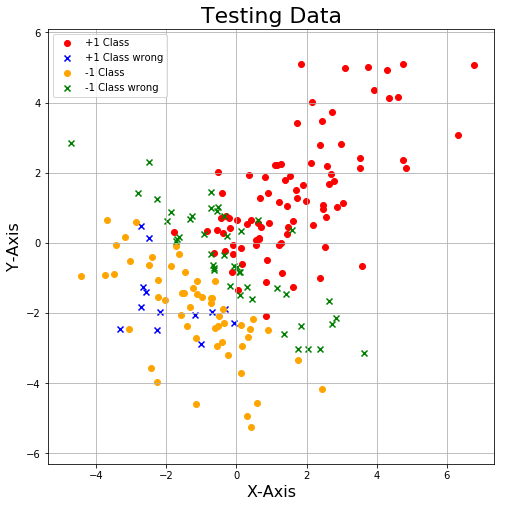

In [28]:
plt.figure(figsize=(8,8))                                                          # creating the figure and assigning the size
plt.scatter(x_c[:,0], x_c[:,1], c='red', marker='o', label='+1 Class')             # class +1 testing scatter plot
plt.scatter(x_w[:,0], x_w[:,1], c='blue', marker='x', label='+1 Class wrong')      # class +1 wrong testing scatter plot
plt.scatter(y_c[:,0], y_c[:,1], c='orange', marker='o', label='-1 Class')          # class -1 testing scatter plot
plt.scatter(y_w[:,0], y_w[:,1], c='green', marker='x', label='-1 Class wrong')     # class -1 wrong testing scatter plot
plt.axis('equal')                                                                  # making both the axis equal
plt.legend(loc='best')                                                             # assigning the legend location
plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
plt.title('Testing Data', fontsize=22)                                             # Title of the plot
plt.grid()                                                                         # displaying gridlines
plt.show()                                                                         # displaying the plot

## Extra Credit: Quadratic Discriminant Analysis

In [29]:
print("mean of class +1:",m_p1)             
print("mean of class -1:",m_m1)             

mean of class +1: [0.97159331 1.07928853]
mean of class -1: [-0.93168452 -1.10645974]


#### Centralizing the data and calculating the covariance of both the classes

In [30]:
x_new = x_train-m_p1
y_new = y_train-m_m1

cov1 = (1/99) * np.dot(np.transpose(x_new), x_new)
cov2 = (1/99) * np.dot(np.transpose(y_new), y_new)

#### Testing Data 

In [31]:
test_data = np.append(x_test,y_test,axis=0)

#### Quadratic Discriminant Function 

In [32]:
f_lis=[]

for i in range(0,200):
    a1 = np.dot(np.transpose(test_data[i]-m_p1),np.dot((test_data[i]-m_p1),inv(cov1)))
    a2 = np.dot(np.transpose(test_data[i]-m_m1),np.dot((test_data[i]-m_m1),inv(cov2)))
    a3 = np.log(np.linalg.det(cov1))
    a4 = np.log(np.linalg.det(cov2))
    f = 0.5*(a1-a2+a3-a4)
    f_lis.append(f)

f_lis=np.array(f_lis)

#### Finding the index of correctly classified and misclassified points from both the classes

In [33]:
f1 = f_lis<0
corr_p1,wr_p1,corr_m1,wr_m1=[],[],[],[]
count=0
for i in range(0,len(f1)):
    if(i<100):
        if(int(f1[i]) == 1):
            count+=1
            corr_p1.append(i)
        else:
            wr_p1.append(i)
    elif(i>=100):
        if(int(f1[i]) == 0):
            count+=1
            corr_m1.append(i-100)
        else:
            wr_m1.append(i-100)

#### Classification Accuracy of QDA on the given data

In [34]:
print("Classification Accuracy:",(count/200)*100,"%")

Classification Accuracy: 83.5 %


#### Finding the correctly classified and misclassified points from both the classes

In [35]:
x_c,x_w,y_c,y_w = [],[],[],[]

for i in corr_p1:
    x_c.append(x_test[i])
for i in wr_p1:
    x_w.append(x_test[i])
for i in corr_m1:
    y_c.append(y_test[i])
for i in wr_m1:
    y_w.append(y_test[i])
    
x_c = np.array(x_c)
x_w = np.array(x_w)
y_c = np.array(y_c)
y_w = np.array(y_w)

#### Scatter plot of testing data after QDA

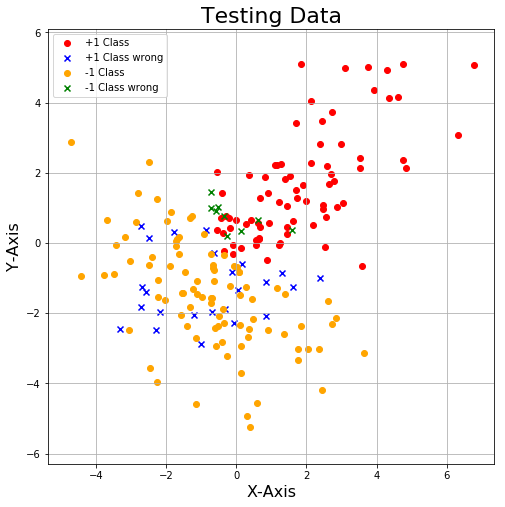

In [36]:
plt.figure(figsize=(8,8))                                                          # creating the figure and assigning the size
plt.scatter(x_c[:,0], x_c[:,1], c='red', marker='o', label='+1 Class')             # class +1 testing scatter plot
plt.scatter(x_w[:,0], x_w[:,1], c='blue', marker='x', label='+1 Class wrong')      # class +1 wrong testing scatter plot
plt.scatter(y_c[:,0], y_c[:,1], c='orange', marker='o', label='-1 Class')          # class -1 testing scatter plot
plt.scatter(y_w[:,0], y_w[:,1], c='green', marker='x', label='-1 Class wrong')     # class -1 wrong testing scatter plot
plt.axis('equal')                                                                  # making both the axis equal
plt.legend(loc='best')                                                             # assigning the legend location
plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
plt.title('Testing Data', fontsize=22)                                             # Title of the plot
plt.grid()                                                                         # displaying gridlines
plt.show()                                                                         # displaying the plot